importing packages

In [ ]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

print(f'Package versions: \n')

print(f'numpy {np.__version__}')
print(f'scipy {scipy.__version__}')
print(f'pandas {pd.__version__}')
print(f'seaborn {sns.__version__}')
print(f'scikit-learn {sklearn.__version__}')
print()

from platform import python_version

print(f'Python versions: \n')
print(f'Python {python_version()}')

# Notebook tested on: 
# numpy 1.22.3
# scipy 1.7.1
# pandas 1.3.4
# seaborn 0.11.2
# scikit-learn 0.24.2
# Python 3.9.7

Package versions: 

numpy 1.21.6
scipy 1.4.1
pandas 1.3.5
seaborn 0.11.2
scikit-learn 1.0.2

Python versions: 

Python 3.7.13


In [ ]:
# This is to clear the warnings from the notebook, usually we should leave this on
import warnings
warnings.filterwarnings('ignore') 

# Plot settings
sns.set_context('notebook') # optimises figures for notebook display
sns.set_style('ticks') # set default plot style
colours = ['#4E79A7','#F28E2C','#E15759','#76B7B2','#59A14F', 
          '#EDC949','#AF7AA1','#FF9DA7','#9C755F','#BAB0AB']
sns.set_palette(colours) # set custom color scheme
%matplotlib inline
plt.rcParams['figure.figsize'] = (9, 6)

importing the data

In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# link = https://drive.google.com/file/d/1iC_jwX8bTjgj31rarYaZeRSX3FaE0i4A/view?usp=sharing
id = '1iC_jwX8bTjgj31rarYaZeRSX3FaE0i4A'

In [ ]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('airbnb_clean.csv')  
# airbnb = pd.read_csv('airbnb_clean.csv', index_col='id', nrows=500)
airbnb = pd.read_csv('airbnb_clean.csv', index_col='id')
# Dataset is now stored in a Pandas Dataframe

In [ ]:
df = airbnb.copy()

In [ ]:
df.head()

,name,description,neighbourhood_overview,host_id,host_name,host_since,host_location,host_about,host_response_time,response_percent,...,review_communication,review_location,review_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
11156,"['oasis', 'city']","['central', 'city', 'reached', 'easy', 'walk',...","['close', 'everything', 'everywhere', 'many', ...",40855,Colleen,2009-09-23,"Potts Point, New South Wales, Australia","['recently', 'retired', 'lived', 'worked', 'co...",missing,missing,...,4.77,4.82,4.71,False,False,1,0,1,0,1.34
14250,"['manly', 'harbour', 'house']","['beautifully', 'renovated', 'spacious', 'quie...","['balgowlah', 'heights', 'one', 'prestigious',...",55948,Heidi,2009-11-20,"Sydney, New South Wales, Australia","['canadian', 'made', 'australia', 'home', 'ten...",within a few hours,100.0,...,4.33,4.67,4.33,True,False,2,2,0,0,0.04
15253,"['unique', 'designer', 'rooftop', 'apartment',...","['penthouse', 'living', 'best', 'staying', 'un...","['location', 'really', 'central', 'number', 't...",59850,Morag,2009-12-03,"Sydney, New South Wales, Australia","['originally', 'scottish', 'made', 'sydney', '...",within an hour,100.0,...,4.67,4.7,4.47,True,True,1,0,1,0,3.21
44545,"['sunny', 'darlinghurst', 'warehouse', 'apartm...","['sunny', 'warehouseloft', 'apartment', 'heart...","['darlinghurst', 'home', 'sydney', 'best', 're...",112237,Atari,2010-04-22,"Sydney, New South Wales, Australia","['curious', 'world', 'full', 'wanderlust', 'ai...",missing,missing,...,4.96,4.93,4.77,False,False,1,1,0,0,0.56
58506,"['studio', 'yindi', 'mosman', 'sydney']","['open', 'plan', 'apartment', 'opens', 'onto',...","['mosman', 'smart', 'middle', 'upper', 'class'...",279955,John,2010-11-06,"Sydney, New South Wales, Australia","['faber', 'est', 'suae', 'quisquae', 'fortunae...",within a few hours,100.0,...,4.9,4.73,4.68,True,False,1,1,0,0,2.23


df.shape

df.describe()

In [ ]:
df.columns

Index(['name', 'description', 'neighbourhood_overview', 'host_id', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'response_percent', 'acceptance_percent', 'host_is_superhost',
       'host_neighbourhood', 'listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_is_verified', 'neighbourhood', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_365', 'number_of_reviews', 'review_rating',
       'review_accuracy', 'review_cleanliness', 'review_checkin',
       'review_communication', 'review_location', 'review_value', 'license',
       'instant_bookable', 

# Obtain text data, drop other data types

In [ ]:
text_cols = ['name', 'description', 'neighbourhood_overview', 'host_about', 'amenities']
response = ['price']
cat_cols = ['host_id',
 'host_name',
 'host_location',
 'host_response_time',
 'host_verifications',
 'host_neighbourhood',
 'neighbourhood',
 'property_type',
 'room_type',
 'bathrooms_text']

misc = ['host_verifications']

labels = text_cols + response + misc
labels

['name',
 'description',
 'neighbourhood_overview',
 'host_about',
 'amenities',
 'price',
 'host_verifications']

In [ ]:
df = df.drop(columns=[col for col in df if col not in labels])

In [ ]:
df

,name,description,neighbourhood_overview,host_about,host_verifications,amenities,price
id,,,,,,,
11156,"['oasis', 'city']","['central', 'city', 'reached', 'easy', 'walk',...","['close', 'everything', 'everywhere', 'many', ...","['recently', 'retired', 'lived', 'worked', 'co...","['email', 'phone', 'reviews']","['hot', 'water', 'long', 'term', 'stays', 'all...",65
14250,"['manly', 'harbour', 'house']","['beautifully', 'renovated', 'spacious', 'quie...","['balgowlah', 'heights', 'one', 'prestigious',...","['canadian', 'made', 'australia', 'home', 'ten...","['email', 'phone', 'reviews', 'jumio', 'offlin...","['hot', 'water', 'coffee', 'maker', 'heating',...",470
15253,"['unique', 'designer', 'rooftop', 'apartment',...","['penthouse', 'living', 'best', 'staying', 'un...","['location', 'really', 'central', 'number', 't...","['originally', 'scottish', 'made', 'sydney', '...","['email', 'phone', 'facebook', 'reviews', 'jum...","['hot', 'water', 'coffee', 'maker', 'long', 't...",82
44545,"['sunny', 'darlinghurst', 'warehouse', 'apartm...","['sunny', 'warehouseloft', 'apartment', 'heart...","['darlinghurst', 'home', 'sydney', 'best', 're...","['curious', 'world', 'full', 'wanderlust', 'ai...","['email', 'phone', 'facebook', 'reviews', 'jum...","['hot', 'water', 'coffee', 'maker', 'long', 't...",130
58506,"['studio', 'yindi', 'mosman', 'sydney']","['open', 'plan', 'apartment', 'opens', 'onto',...","['mosman', 'smart', 'middle', 'upper', 'class'...","['faber', 'est', 'suae', 'quisquae', 'fortunae...","['email', 'phone', 'facebook', 'reviews', 'jum...","['hot', 'water', 'coffee', 'maker', 'long', 't...",150
...,...,...,...,...,...,...,...
53694459,"['sunny', 'rooms']","['license', 'number']",['missing'],['missing'],"['email', 'phone', 'jumio', 'offline_governmen...","['tv', 'hot', 'water', 'long', 'term', 'stays'...",79
53694614,"['sunny', 'rooms']","['license', 'number']",['missing'],['missing'],"['email', 'phone', 'jumio', 'offline_governmen...","['tv', 'hot', 'water', 'long', 'term', 'stays'...",80
53709256,"['macquarie', 'park', 'bedroom', 'close', 'sho...","['modern', 'bedroom', 'bathroom', 'apartment',...",['missing'],['missing'],"['email', 'phone']","['hot', 'water', 'long', 'term', 'stays', 'all...",150


In [ ]:
print(f'There are {len(text_cols)} text variables')
print(f'There are {len(cat_cols)} categorical variables')

There are 5 text variables
There are 10 categorical variables


for col in cat_cols:
  if col in df.columns:
    pass
  else:
    print(col)

In [ ]:
df.shape

(20880, 7)

In total, the current df has 15 predictors and 1 response variable, with a total of 20,880 observations

# Distribution of text lengths

name = df[text_cols[0]]

plt.figure(figsize=(15,10))
name.max().sort_values(by="points",ascending=False)["points"].plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Country of Origin")
plt.ylabel("Highest point of Wines")
plt.show()

Text(0.5, 1.0, 'Listing Description Number of Characters')

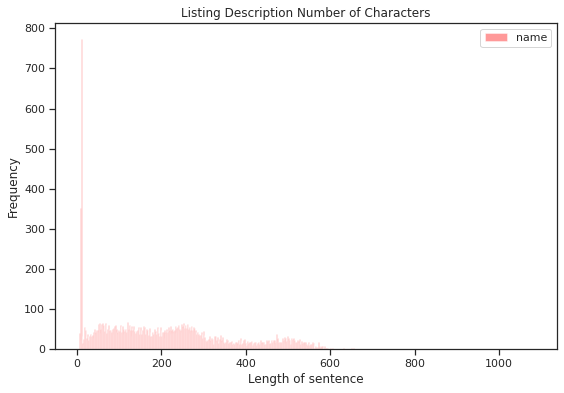

In [298]:
descrip = df['description']

descrip_len = [len(word) for word in descrip]
df['description_length'] = descrip_len
# descrip_len

plt.hist(descrip_len, bins=range(min(descrip_len), max(descrip_len) + 1, 1), 
              alpha=0.4, color="red")

plt.legend(labels)
plt.xlabel("Length of sentence")
plt.ylabel("Frequency")
plt.title('Listing Description Number of Characters')

Text(0.5, 1.0, 'Listing Neighbourhood Overview Number of Characters')

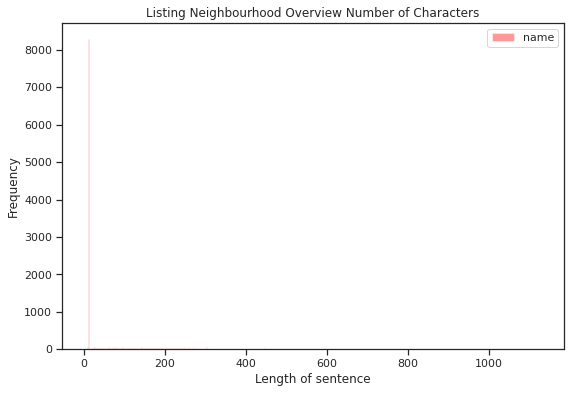

In [299]:
neighbourhood_ov = df['neighbourhood_overview']

neighbourhood_ov_len = [len(word) for word in neighbourhood_ov]
df['neighbourhood_overview_length'] = neighbourhood_ov_len

plt.hist(neighbourhood_ov_len, bins=range(min(neighbourhood_ov_len), max(neighbourhood_ov_len) + 1, 1), 
              alpha=0.4, color="red")

plt.legend(labels)
plt.xlabel("Length of sentence")
plt.ylabel("Frequency")
plt.title('Listing Neighbourhood Overview Number of Characters')

In [ ]:
from scipy import stats
a = np.arange(10)
stats.describe(neighbourhood_ov_len)

DescribeResult(nobs=20880, minmax=(2, 1128), mean=135.63663793103447, variance=27394.72897035216, skewness=1.7476498747299254, kurtosis=3.535090773247857)

In [301]:
from scipy import stats

def num_char(data, label):
  text = data[label]

  text_sent_length = [len(sentence) for sentence in text]
  data[f'{label}_length'] = text_sent_length

  text_stat = stats.describe(text_sent_length)
  print(f'{label}: {text_stat}\n')

  plt.figure()

  plt.hist(text_sent_length, bins=range(min(text_sent_length), max(text_sent_length) + 1, 1), 
                alpha=0.4, color="red")

  plt.legend(labels)
  plt.xlabel("Length of sentence")
  plt.ylabel("Frequency")
  plt.title(f'Listing {label.capitalize()} Number of Characters')

name: DescribeResult(nobs=20880, minmax=(2, 264), mean=47.0441570881226, variance=214.71522999974857, skewness=0.20432449727567514, kurtosis=5.482321776468984)

description: DescribeResult(nobs=20880, minmax=(2, 1083), mean=221.25646551724137, variance=23731.964539832134, skewness=0.5673351645642083, kurtosis=-0.5415507153701977)

neighbourhood_overview: DescribeResult(nobs=20880, minmax=(2, 1128), mean=135.63663793103447, variance=27394.72897035216, skewness=1.7476498747299254, kurtosis=3.535090773247857)

host_about: DescribeResult(nobs=20880, minmax=(2, 4070), mean=183.2707375478927, variance=90798.15587531212, skewness=3.078497073718206, kurtosis=15.23486710361193)

amenities: DescribeResult(nobs=20880, minmax=(2, 1833), mean=405.5447796934866, variance=66585.5678016661, skewness=1.3913971647573657, kurtosis=2.2385024616255826)



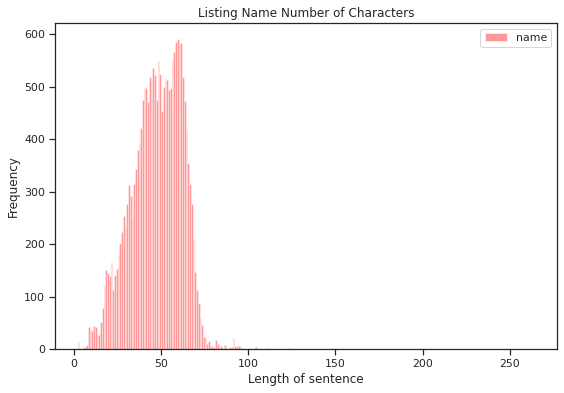

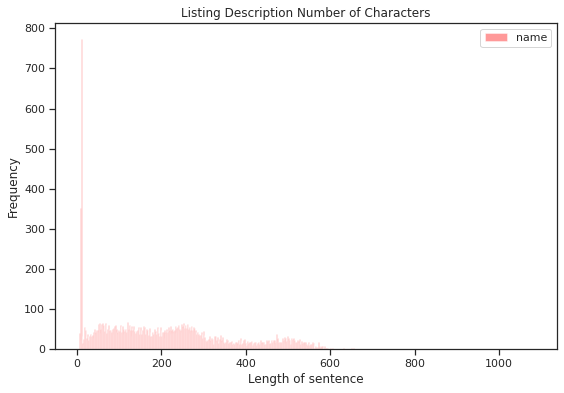

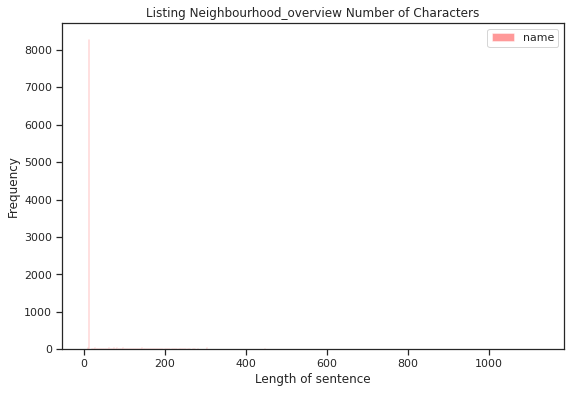

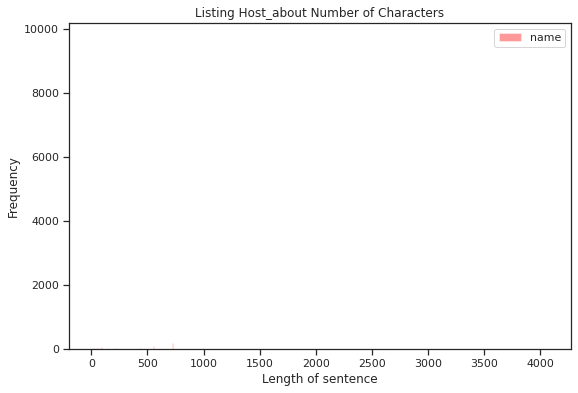

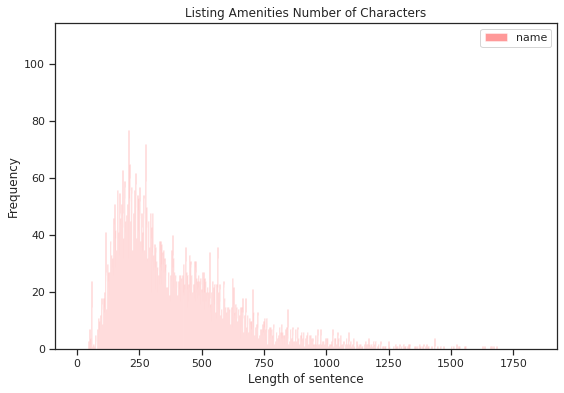

In [302]:
for col in text_cols:
  num_char(df, col)

In [ ]:
text_var_stats = pd.DataFrame()

def sentence_length_stats(data, label):
  text = data[label]
  text_sent_length = [len(sentence) for sentence in text]
  text_stat = stats.describe(text_sent_length)

  text_stat_col = pd.DataFrame([text_stat], columns=text_stat._fields, index=[label])
  text_stat_col = text_stat_col.T
  text_var_stats[f'{label}'] = text_stat_col
  text_stat_col = text_stat_col.T
  return text_var_stats

In [ ]:
for col in text_cols:
  sentence_length_stats(df, col)

text_var_stats

,name,description,neighbourhood_overview,host_about,amenities
nobs,20880,20880,20880,20880,20880
minmax,"(2, 264)","(2, 1083)","(2, 1128)","(2, 4070)","(2, 1833)"
mean,47.044157,221.256466,135.636638,183.270738,405.54478
variance,214.71523,23731.96454,27394.72897,90798.155875,66585.567802
skewness,0.204324,0.567335,1.74765,3.078497,1.391397
kurtosis,5.482322,-0.541551,3.535091,15.234867,2.238502


# Create Document Term Matrix

There are a few different kinds of NLP, the main ones that we’ve worked with in my bootcamp are CountVectorizer (CVec) and TFIDF Vectorizer (Term Frequency Inverse Document Frequency). Knowing how to choose between the different kinds is often just a case of testing both on your data (or a subset of your data) and seeing which one performs better.
* CountVectorizer (CVec) is going to count the number of times a word shows up within a document.
* TFIDF Vectorizer (Term Frequency Inverse Document Frequency) is going to compare the number of times a word appears within a document to how many documents that phrase appears in.

In [ ]:
text_df = df[text_cols] 
text_cols

['name', 'description', 'neighbourhood_overview', 'host_about', 'amenities']

In [ ]:
# Creating Document Term Matrix - 'name' 
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(text_df['name'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=text_df['name'].index
df_dtm.head(3)

,aarons,abbey,abbotsford,abercrombie,abode,abounds,absolute,absolutely,abstract,abus,...,아담하고,아이와함께,여행하시는분들을,위한,저렴하고,진하우스,편안한,하우스,호주의,１bed
id,,,,,,,,,,,,,,,,,,,,,
11156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14250,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15253,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Creating Document Term Matrix - 'description' 
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(text_df['description'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=text_df['description'].index
df_dtm.head(3)

,aapartment,aarons,abbotsford,abbotsleigh,abc,abercrombie,abide,abilities,ability,abit,...,트레인으로분걸리는,편리한,편리합니다,편안하게,편의점,플리밍턴,하여서,하우스별채,한국,할수있습니다
id,,,,,,,,,,,,,,,,,,,,,
11156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14250,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15253,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Creating Document Term Matrix - 'neighbourhood_overview' 
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(text_df['neighbourhood_overview'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=text_df['neighbourhood_overview'].index
df_dtm.head(3)

,abbotsford,abbott,abercrombie,ability,able,aboard,abode,aboriginal,aboriginals,abound,...,餐饮店,餐馆,饭后可去散步颐养身心,马来西亚餐馆,驾车五分钟到中国人社区,高尔夫球场,高档公寓位于悉尼市最中心主街george,高档的居住小区,鸟语花香,麦考瑞购物中心及火车站
id,,,,,,,,,,,,,,,,,,,,,
11156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14250,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15253,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Creating Document Term Matrix - 'host_about' 
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(text_df['host_about'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=text_df['host_about'].index
df_dtm.head(3)

,aaa,aagygoodluck,aaron,abandonment,abbey,abbiate,abbie,abc,abe,abelia,...,펼리한,포함한,하버강줄기를,한국어와,한중,할수있는,호주인을,ｻﾘｰﾋﾙｽﾞというｴﾘｱに有るﾜﾝﾍﾞｯﾄﾞﾙｰﾑﾏﾝｼｮﾝです,ｼﾄﾞﾆｰ市内から歩いて分に位置する,ﾊﾟﾝｹｰｷで大人気のbillsｶﾌｪへも歩いて分程度です
id,,,,,,,,,,,,,,,,,,,,,
11156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14250,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15253,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# EDA - Text Data

## Worldcloud Visualization

all_words = ' '.join([text for text in df['name']])
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=500, random_state=21, background_color='black', colormap='Set2', max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


In [ ]:
from wordcloud import WordCloud

def wc(data, label):
  print(f'Word Cloud based on {label.capitalize()}')
  all_words = ' '.join([text for text in data[label]])
  string_text = str(all_words)
  
  wordcloud = WordCloud(width=800, height=500, random_state=21, background_color='black', colormap='Set2', max_font_size=110, collocations=False).generate(string_text)
  
  plt.figure(figsize=(10, 7))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis('off')
  plt.show()

text_cols

wc(df, 'description')

Word Cloud based on Name


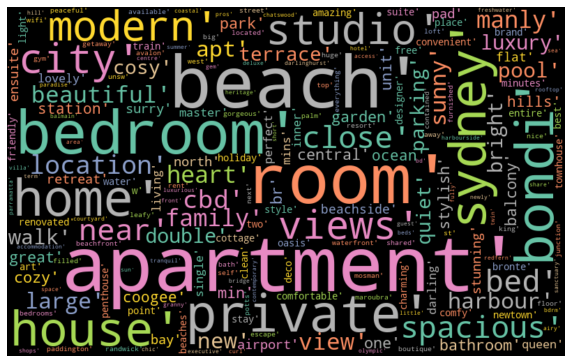

Word Cloud based on Description


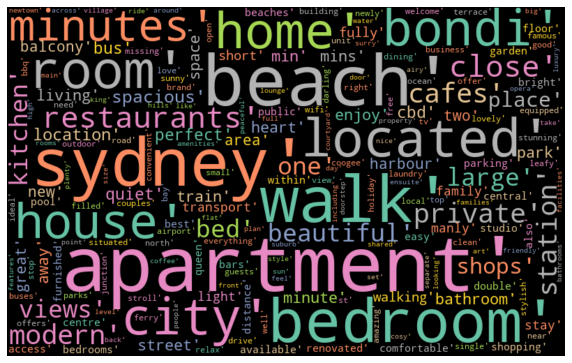

Word Cloud based on Neighbourhood_overview


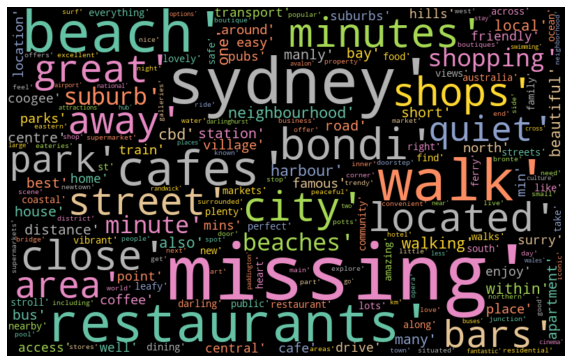

Word Cloud based on Host_about


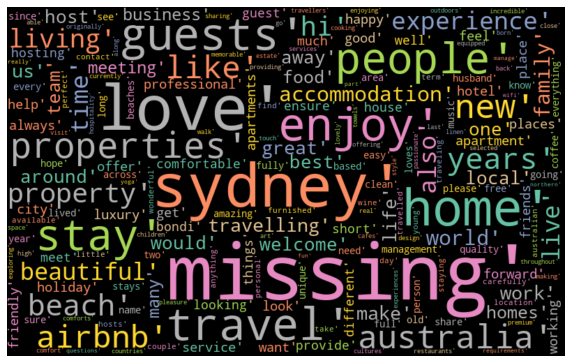

Word Cloud based on Amenities


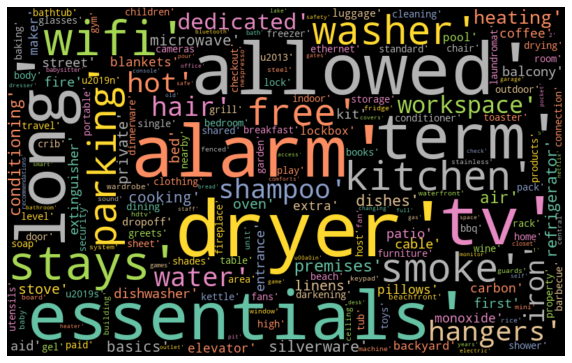

In [ ]:
for col in text_cols:
  wc(df, col)

Inferences:
* Name - The majority of airbnb listing has 'apartment' featured in the name of the listing, which is closely follwed by 'beach', 'bedroom', 'room'.
* Description - Interestingly, the same common words are expressed in description as Name 
  - May indicate multicollinearity, thus should only use one
  - This is interesting because the author chose to put similar vocabularies in the name as description, which may be the reason for similar results
* Neighbourhood overview  and  Host about - Interestingly, the majority of text data for neighbourhood overview and host about is actually missing, that is there is a lack of text for these varaibles.

Word Cloud based on Host_verifications


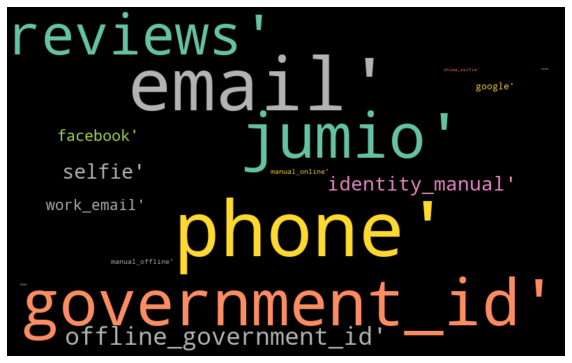

In [ ]:
wc(df, 'host_verifications')

# Polarity
https://towardsdatascience.com/sentimental-analysis-using-vader-a3415fef7664

In [252]:
text_cols

['name', 'description', 'neighbourhood_overview', 'host_about', 'amenities']

In [253]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [254]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [255]:
sid = SentimentIntensityAnalyzer()

Add scores and labels to column

In [256]:
df['descrip_scores'] = df['description'].apply(lambda x: sid.polarity_scores(x))

df.head()

,name,description,neighbourhood_overview,host_id,host_name,host_since,host_location,host_about,host_response_time,response_percent,...,review_location,review_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,descrip_scores
id,,,,,,,,,,,,,,,,,,,,,
11156,"['oasis', 'city']","['central', 'city', 'reached', 'easy', 'walk',...","['close', 'everything', 'everywhere', 'many', ...",40855,Colleen,2009-09-23,"Potts Point, New South Wales, Australia","['recently', 'retired', 'lived', 'worked', 'co...",missing,missing,...,4.82,4.71,False,False,1,0,1,0,1.34,"{'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compou..."
14250,"['manly', 'harbour', 'house']","['beautifully', 'renovated', 'spacious', 'quie...","['balgowlah', 'heights', 'one', 'prestigious',...",55948,Heidi,2009-11-20,"Sydney, New South Wales, Australia","['canadian', 'made', 'australia', 'home', 'ten...",within a few hours,100.0,...,4.67,4.33,True,False,2,2,0,0,0.04,"{'neg': 0.0, 'neu': 0.866, 'pos': 0.134, 'comp..."
15253,"['unique', 'designer', 'rooftop', 'apartment',...","['penthouse', 'living', 'best', 'staying', 'un...","['location', 'really', 'central', 'number', 't...",59850,Morag,2009-12-03,"Sydney, New South Wales, Australia","['originally', 'scottish', 'made', 'sydney', '...",within an hour,100.0,...,4.7,4.47,True,True,1,0,1,0,3.21,"{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'comp..."
44545,"['sunny', 'darlinghurst', 'warehouse', 'apartm...","['sunny', 'warehouseloft', 'apartment', 'heart...","['darlinghurst', 'home', 'sydney', 'best', 're...",112237,Atari,2010-04-22,"Sydney, New South Wales, Australia","['curious', 'world', 'full', 'wanderlust', 'ai...",missing,missing,...,4.93,4.77,False,False,1,1,0,0,0.56,"{'neg': 0.037, 'neu': 0.605, 'pos': 0.358, 'co..."
58506,"['studio', 'yindi', 'mosman', 'sydney']","['open', 'plan', 'apartment', 'opens', 'onto',...","['mosman', 'smart', 'middle', 'upper', 'class'...",279955,John,2010-11-06,"Sydney, New South Wales, Australia","['faber', 'est', 'suae', 'quisquae', 'fortunae...",within a few hours,100.0,...,4.73,4.68,True,False,1,1,0,0,2.23,"{'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'comp..."


In [257]:
df['descrip_compound']  = df['descrip_scores'].apply(lambda x: x['compound'])
df.loc[:, ['descrip_scores', 'descrip_compound']]

,descrip_scores,descrip_compound
id,,
11156,"{'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compou...",0.7430
14250,"{'neg': 0.0, 'neu': 0.866, 'pos': 0.134, 'comp...",0.5719
15253,"{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'comp...",0.7184
44545,"{'neg': 0.037, 'neu': 0.605, 'pos': 0.358, 'co...",0.9643
58506,"{'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'comp...",0.4019
...,...,...
53694459,"{'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'comp...",0.0772
53694614,"{'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'comp...",0.0772
53709256,"{'neg': 0.0, 'neu': 0.809, 'pos': 0.191, 'comp...",0.5106


In [258]:
df['descrip_comp_score'] = df['descrip_compound'].apply(lambda c: 'pos' if c>0 else ('neg' if c<0 else 'neu'))
df.head(3)

,name,description,neighbourhood_overview,host_id,host_name,host_since,host_location,host_about,host_response_time,response_percent,...,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,descrip_scores,descrip_compound,descrip_comp_score
id,,,,,,,,,,,,,,,,,,,,,
11156,"['oasis', 'city']","['central', 'city', 'reached', 'easy', 'walk',...","['close', 'everything', 'everywhere', 'many', ...",40855,Colleen,2009-09-23,"Potts Point, New South Wales, Australia","['recently', 'retired', 'lived', 'worked', 'co...",missing,missing,...,False,False,1,0,1,0,1.34,"{'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compou...",0.7430,pos
14250,"['manly', 'harbour', 'house']","['beautifully', 'renovated', 'spacious', 'quie...","['balgowlah', 'heights', 'one', 'prestigious',...",55948,Heidi,2009-11-20,"Sydney, New South Wales, Australia","['canadian', 'made', 'australia', 'home', 'ten...",within a few hours,100.0,...,True,False,2,2,0,0,0.04,"{'neg': 0.0, 'neu': 0.866, 'pos': 0.134, 'comp...",0.5719,pos
15253,"['unique', 'designer', 'rooftop', 'apartment',...","['penthouse', 'living', 'best', 'staying', 'un...","['location', 'really', 'central', 'number', 't...",59850,Morag,2009-12-03,"Sydney, New South Wales, Australia","['originally', 'scottish', 'made', 'sydney', '...",within an hour,100.0,...,True,True,1,0,1,0,3.21,"{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'comp...",0.7184,pos


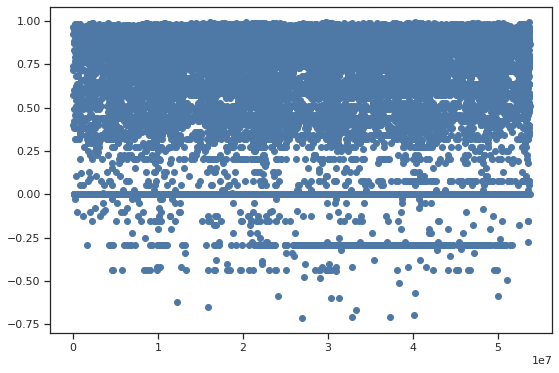

In [259]:
plt.scatter(x=df.index,y=df['descrip_compound'])

Text(0.5, 1.0, 'Sentiment Analysis Score of Description')

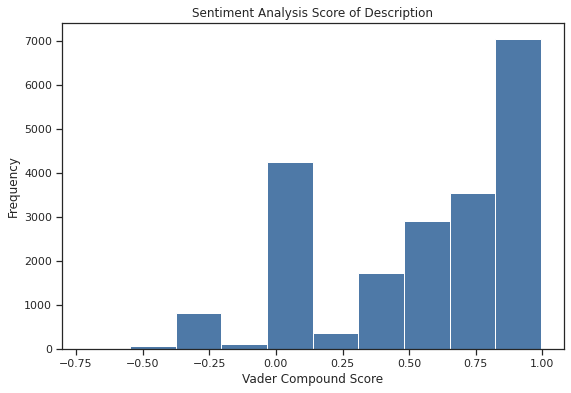

In [260]:
plt.hist(df['descrip_compound'])
plt.xlabel("Vader Compound Score")
plt.ylabel("Frequency")
plt.title(f'Sentiment Analysis Score of Description')

Text(0.5, 1.0, 'Sentiment Analysis Boxplot of Description')

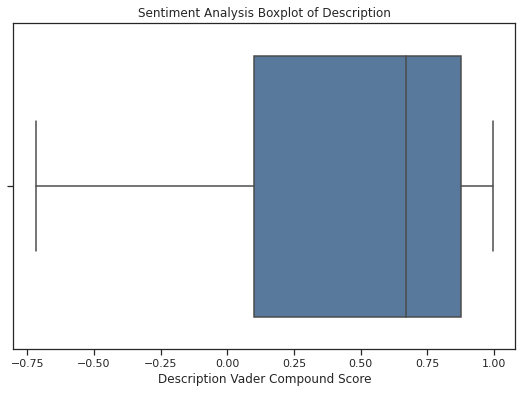

In [261]:
sns.boxplot(df['descrip_compound']).set(xlabel='Description Vader Compound Score')
plt.title(f'Sentiment Analysis Boxplot of Description')

In [262]:
stats.describe(df['descrip_compound'])

DescribeResult(nobs=20880, minmax=(-0.7176, 0.9948), mean=0.5418321647509579, variance=0.15190259548149596, skewness=-0.7008311142766659, kurtosis=-0.8669615170129616)

Text(0.5, 1.0, 'Sentiment Analysis Categories of Description')

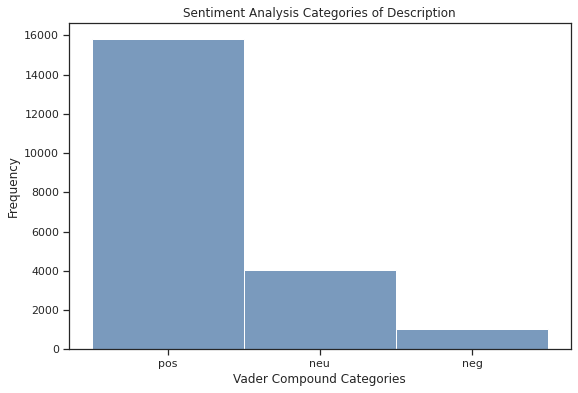

In [263]:
sns.histplot(df['descrip_comp_score'])
plt.xlabel("Vader Compound Categories")
plt.ylabel("Frequency")
plt.title(f'Sentiment Analysis Categories of Description')

In [264]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def senti_analyze(data, label):
  sid = SentimentIntensityAnalyzer()

  print(f'{label.capitalize()}')
  data[f'{label}_scores'] = data[label].apply(lambda x: sid.polarity_scores(x))
  data[f'{label}_compound']  = data[f'{label}_scores'].apply(lambda x: x['compound'])
  data[f'{label}_comp_score'] = data[f'{label}_compound'].apply(lambda c: 'pos' if c>0 else ('neg' if c<0 else 'neu'))

  v_stat = stats.describe(data[f'{label}_compound'])
  print(v_stat)
  # var_stats = pd.DataFrame([v_stat], columns=v_stat._fields)
  
  plt.figure()
  plt.hist(data[f'{label}_compound'])
  plt.xlabel("Vader Compound Score")
  plt.ylabel("Frequency")
  plt.title(f'Sentiment Analysis Score of {label.capitalize()}')
  plt.show()

  plt.figure()
  sns.boxplot(data[f'{label}_compound']).set(xlabel=f'{label.capitalize()} Vader Compound Score')
  plt.title(f'Sentiment Analysis Boxplot of {label.capitalize()}')
  plt.show()

  plt.figure()
  sns.histplot(data[f'{label}_comp_score'])
  plt.xlabel("Vader Compound Categories")
  plt.ylabel("Frequency")
  plt.title(f'Sentiment Analysis Categories of {label.capitalize()}')
  plt.show()



In [265]:
text_cols

['name', 'description', 'neighbourhood_overview', 'host_about', 'amenities']

Neighbourhood_overview
DescribeResult(nobs=20880, minmax=(-0.7003, 0.9935), mean=0.18421027777777782, variance=0.23853228114346417, skewness=0.3536030095469846, kurtosis=-1.5422089676163815)


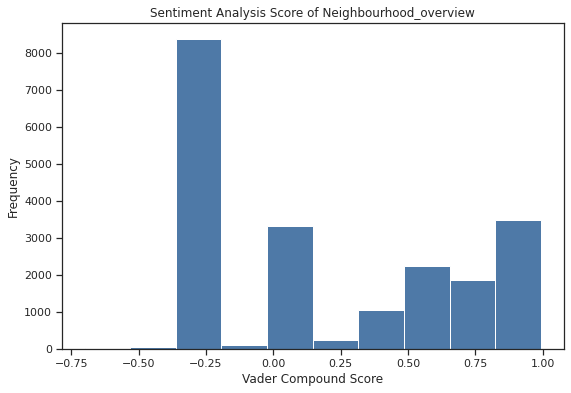

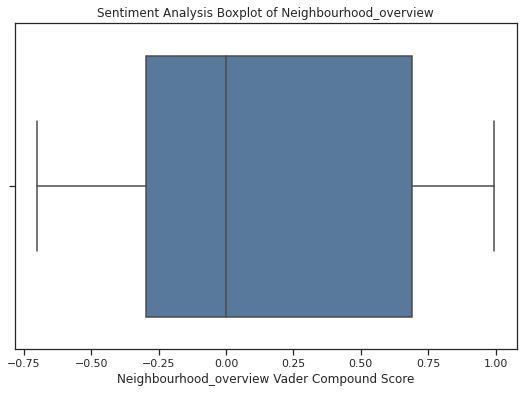

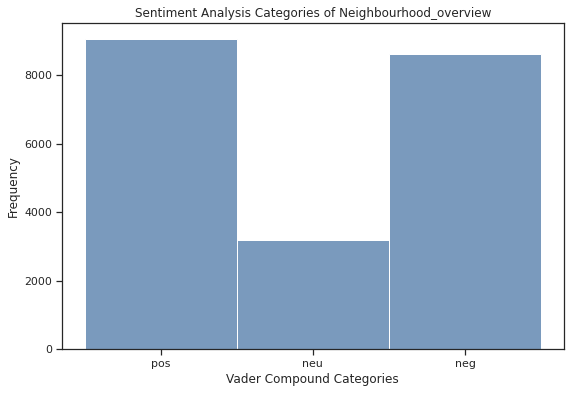

In [266]:
senti_analyze(df, 'neighbourhood_overview')

Host_about
DescribeResult(nobs=20880, minmax=(-0.8316, 0.9992), mean=0.26175920977011496, variance=0.3233849532750114, skewness=0.18084928747727178, kurtosis=-1.8273041235388503)


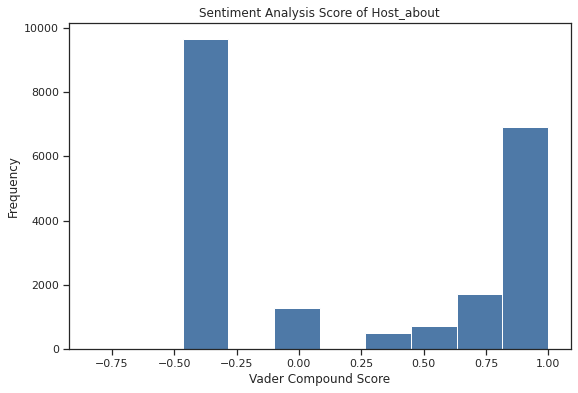

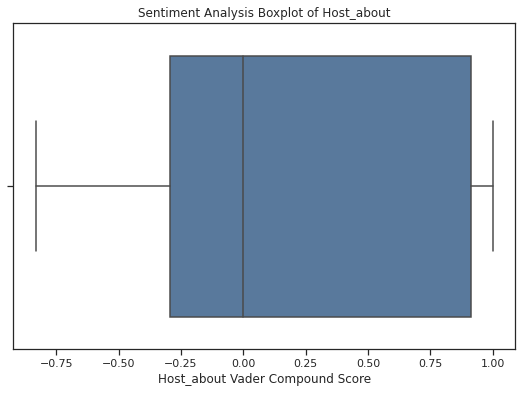

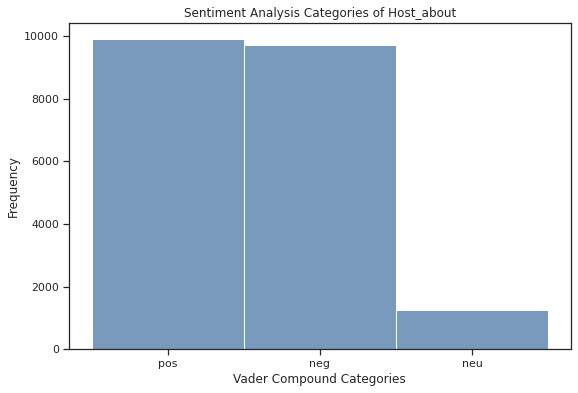

In [267]:
 senti_analyze(df, 'host_about')

In [ ]:
text_cols

['name', 'description', 'neighbourhood_overview', 'host_about', 'amenities']

v_stat = stats.describe(df['descrip_compound'])
var_stats = pd.DataFrame([v_stat], columns=v_stat._fields, index=['description'])
var_stats

In [ ]:
print(text_cols[2:-1])

['neighbourhood_overview', 'host_about']


v_stat = stats.describe(df['descrip_compound'])
var_stats = pd.DataFrame([v_stat], columns=v_stat._fields, index=['description'])

v_stat = stats.describe(df['host_about_compound'])
var_stats = pd.DataFrame([v_stat], columns=v_stat._fields, index=['host_about'])

var_stats = pd.DataFrame()

for label in text_cols[2:-1]:
  v_stat = stats.describe(df[f'{label}_compound'])
  v_stat_col = pd.DataFrame([v_stat], columns=v_stat._fields, index=[label])
  v_stat_col = v_stat_col.T
  var_stats[f'{label}'] = v_stat_col

var_stats

In [ ]:
var_stats = pd.DataFrame()

def vp_stats(data, label):
  v_stat = stats.describe(data[f'{label}_compound'])
  v_stat_col = pd.DataFrame([v_stat], columns=v_stat._fields, index=[label])
  v_stat_col = v_stat_col.T
  var_stats[f'{label}'] = v_stat_col
  # var_stats = var_stats.transpose()
  return var_stats

In [ ]:
for col in text_cols[2:-1]:
  vp_stats(df, col)

var_stats

,neighbourhood_overview,host_about
nobs,20880,20880
minmax,"(-0.7003, 0.9935)","(-0.8316, 0.9992)"
mean,0.18421,0.261759
variance,0.238532,0.323385
skewness,0.353603,0.180849
kurtosis,-1.542209,-1.827304


In [ ]:
# need to add decrip by itself cuz name difference
vp_stats(df, 'descrip')

,neighbourhood_overview,host_about,descrip
nobs,20880,20880,20880
minmax,"(-0.7003, 0.9935)","(-0.8316, 0.9992)","(-0.7176, 0.9948)"
mean,0.18421,0.261759,0.541832
variance,0.238532,0.323385,0.151903
skewness,0.353603,0.180849,-0.700831
kurtosis,-1.542209,-1.827304,-0.866962


In [ ]:
var_stats.rename(columns={"descrip": "description"})

,neighbourhood_overview,host_about,description
nobs,20880,20880,20880
minmax,"(-0.7003, 0.9935)","(-0.8316, 0.9992)","(-0.7176, 0.9948)"
mean,0.18421,0.261759,0.541832
variance,0.238532,0.323385,0.151903
skewness,0.353603,0.180849,-0.700831
kurtosis,-1.542209,-1.827304,-0.866962


In [ ]:
var_stats.T

,nobs,minmax,mean,variance,skewness,kurtosis
neighbourhood_overview,20880,"(-0.7003, 0.9935)",0.18421,0.238532,0.353603,-1.542209
host_about,20880,"(-0.8316, 0.9992)",0.261759,0.323385,0.180849,-1.827304
descrip,20880,"(-0.7176, 0.9948)",0.541832,0.151903,-0.700831,-0.866962


# Bivariate Analysis

In [245]:
df.columns

Index(['name', 'description', 'neighbourhood_overview', 'host_id', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'response_percent', 'acceptance_percent', 'host_is_superhost',
       'host_neighbourhood', 'listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_is_verified', 'neighbourhood', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_365', 'number_of_reviews', 'review_rating',
       'review_accuracy', 'review_cleanliness', 'review_checkin',
       'review_communication', 'review_location', 'review_value', 'license',
       'instant_bookable', 

## Sentiment Analysis X Price

In [246]:
text_cols

['name', 'description', 'neighbourhood_overview', 'host_about', 'amenities']

In [285]:
df_senti_label = ['price', 'descrip_compound', 'neighbourhood_overview_compound', 'host_about_compound']
df_senti = df[df_senti_label]

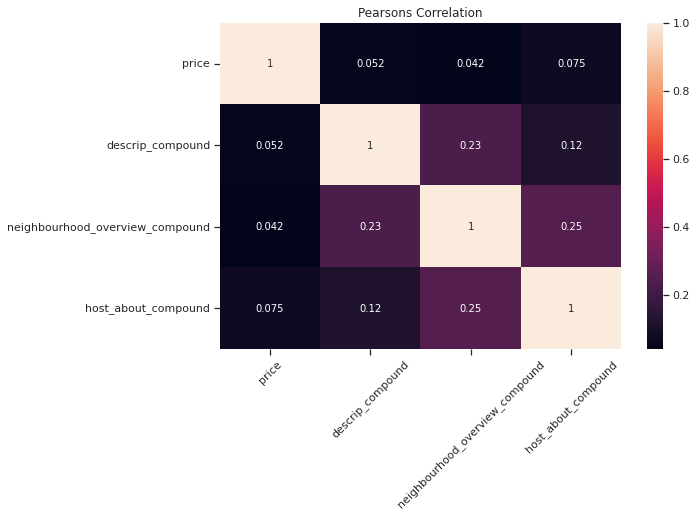

In [312]:
corrMatrix = df_senti.corr()
sns.heatmap(corrMatrix, annot=True)
plt.title("Pearsons Correlation")
plt.xticks(rotation=45) 
plt.show()

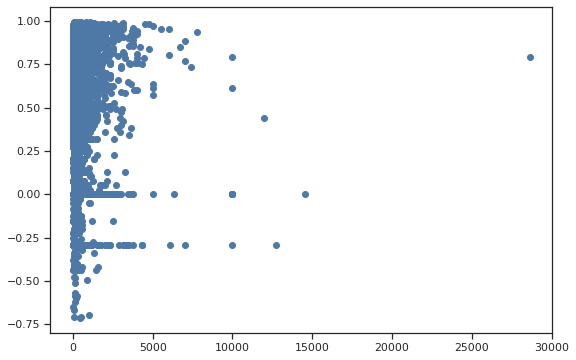

In [287]:
plt.scatter(y=df_senti['descrip_compound'],x=df_senti['price'])

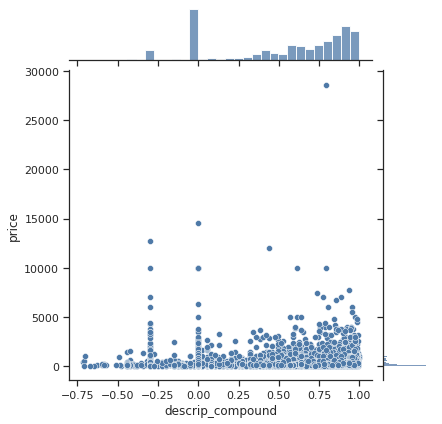

In [288]:
sns.jointplot(data=df_senti, x='descrip_compound', y='price')

In [289]:
def bivar(data, label):
  plt.figure()
  sns.jointplot(data=data, x=label, y='price')
  # plt.xlabel(f"{label.capitalize()}")
  # plt.ylabel("Frequency")
  # plt.title(f'Scatterplot of {label.capitalize()}')
  plt.show()

In [290]:
df_senti.columns

Index(['price', 'descrip_compound', 'neighbourhood_overview_compound',
       'host_about_compound'],
      dtype='object')

<Figure size 648x432 with 0 Axes>

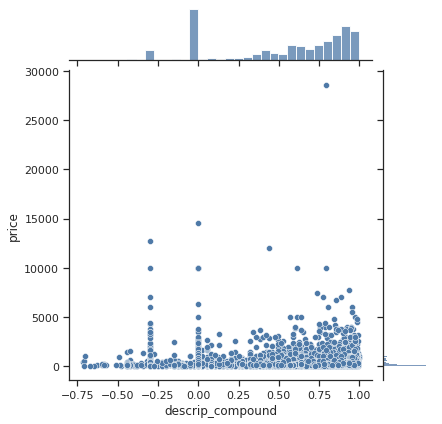

<Figure size 648x432 with 0 Axes>

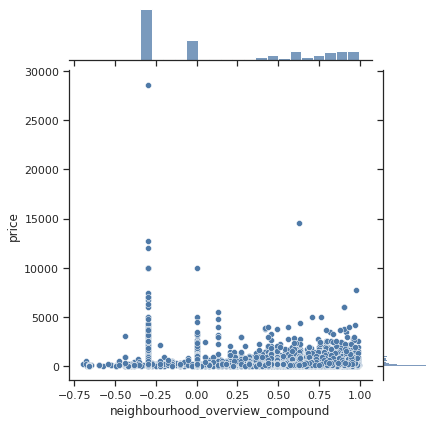

<Figure size 648x432 with 0 Axes>

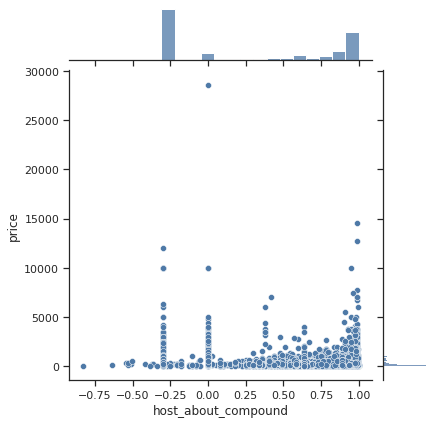

In [291]:
for col in ['descrip_compound', 'neighbourhood_overview_compound',
       'host_about_compound']:
  bivar(df_senti, col)

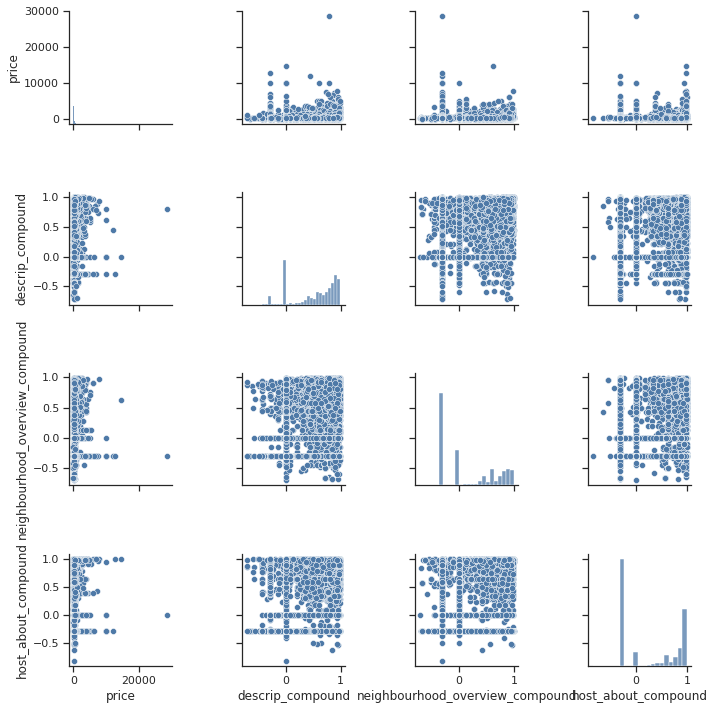

In [292]:
sns.pairplot(df_senti)

In [293]:
my_r = df_senti.corr(method="spearman")
print(my_r)

                                    price  descrip_compound  \
price                            1.000000          0.185598   
descrip_compound                 0.185598          1.000000   
neighbourhood_overview_compound  0.189700          0.227499   
host_about_compound              0.173354          0.127265   

                                 neighbourhood_overview_compound  \
price                                                   0.189700   
descrip_compound                                        0.227499   
neighbourhood_overview_compound                         1.000000   
host_about_compound                                     0.269190   

                                 host_about_compound  
price                                       0.173354  
descrip_compound                            0.127265  
neighbourhood_overview_compound             0.269190  
host_about_compound                         1.000000  


In [294]:
def display_correlation(df):
    r = df.corr(method="spearman")
    plt.figure(figsize=(10,6))
    heatmap = sns.heatmap(df.corr(), vmin=-1, 
                      vmax=1, annot=True)
    plt.title("Spearman Correlation")
    plt.xticks(rotation=45)
    return(r)

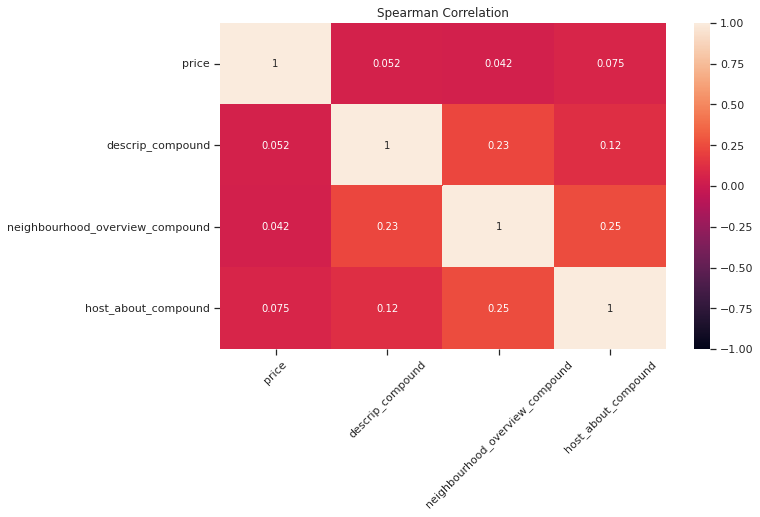

In [295]:
r_simple=display_correlation(df_senti)

## Sentence Length X Price

In [303]:
df.columns

Index(['name', 'description', 'neighbourhood_overview', 'host_id', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'response_percent', 'acceptance_percent', 'host_is_superhost',
       'host_neighbourhood', 'listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_is_verified', 'neighbourhood', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_365', 'number_of_reviews', 'review_rating',
       'review_accuracy', 'review_cleanliness', 'review_checkin',
       'review_communication', 'review_location', 'review_value', 'license',
       'instant_bookable', 

In [309]:
df_length_label = ['price', 'description_length', 'neighbourhood_overview_length', 'name_length', 'host_about_length', 'amenities_length']
df_length = df[df_length_label]
df_length.head(3)

,price,description_length,neighbourhood_overview_length,name_length,host_about_length,amenities_length
id,,,,,,
11156,65,126,103,17,343,443
14250,470,251,527,29,253,451
15253,82,129,202,66,1177,757


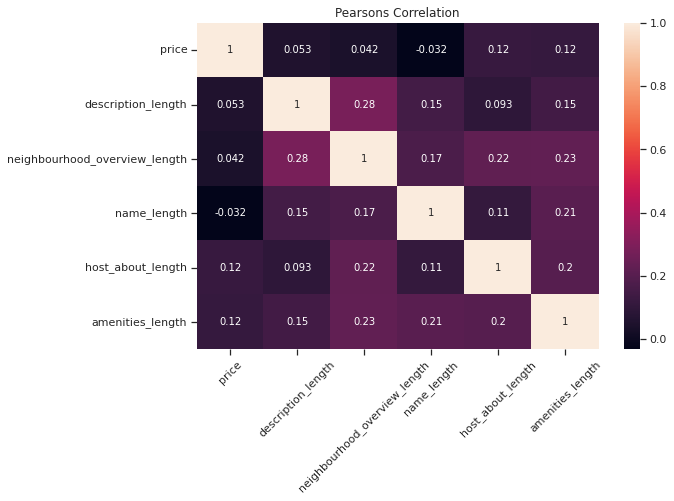

In [314]:
corrMatrix = df_length.corr()
sns.heatmap(corrMatrix, annot=True)
plt.title("Pearsons Correlation")
plt.xticks(rotation=45) 
plt.show()

<Figure size 648x432 with 0 Axes>

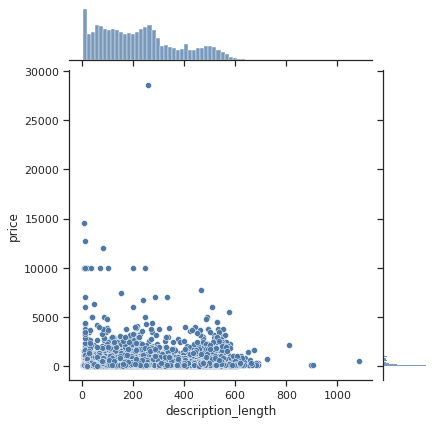

<Figure size 648x432 with 0 Axes>

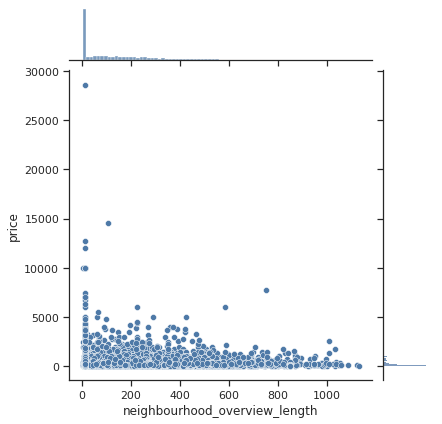

<Figure size 648x432 with 0 Axes>

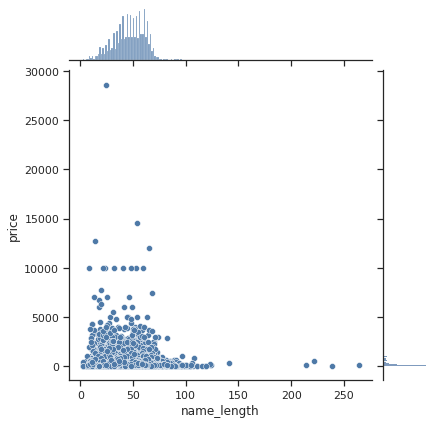

<Figure size 648x432 with 0 Axes>

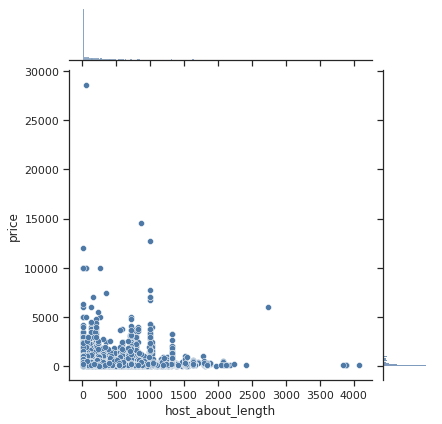

<Figure size 648x432 with 0 Axes>

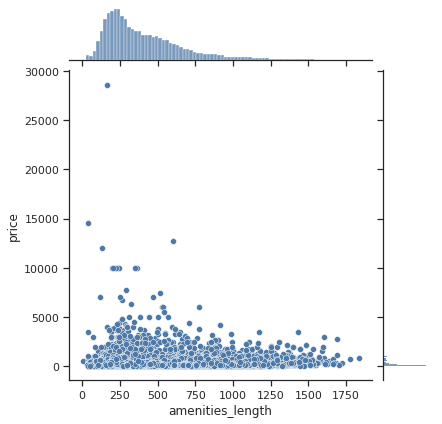

In [311]:
for col in df_length_label[1:]:
  bivar(df_length, col)

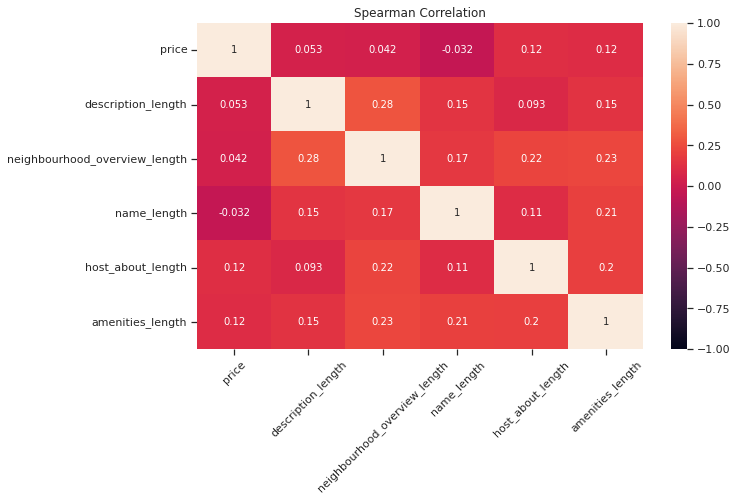

In [313]:
r_simple=display_correlation(df_length)